In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [3]:
CEL = pd.read_csv('./magazine/final/CEL_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [4]:
CEL['ADFN_2'] = CEL['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [5]:
CEL['ADFN_2']

0      [골드, 장식, 포인트, 준, 케이프, 체크, 코트, 백, 산드로, Sandro, ...
1           [빈티지, 한, 주름, 워싱, 특징, 데님, 팬츠, CELINE, CELINE]
2                 [대, 에스닉, 분위기, 물씬, CELINE, 방패, 모양, 숄더백]
3      [재킷, 셔츠, 슈즈, CELINE, CELINE, 블랙, 스커트, 렉토, 이어링,...
4      [재킷, 셔츠, 크리스, CELINE, CELINE, 팬츠, 다잉브, 리드, 슈즈,...
                             ...                        
956    [밀란, 패션위크, 참석, 차, 출국, 리사, 공항, BLACKPINK, 리사, 오...
957    [리사, 패션, 브랜드, 탄생, 할, 보인다, YG, 엔터테인먼트, BLACKPIN...
958    [서로, 팬임, 인증, 두, 스타, BLACKPINK, 세레나, 고메즈, 함께한, ...
959    [내셔널, 아이스크림, 데이, 기념, BLACKPINK, 귀여운, 포스팅, 제니, ...
960    [한국, 신진, 디자이너, 하이, 패션, 브랜드, 섭렵, 블핑, BLACKPINK,...
Name: ADFN_2, Length: 961, dtype: object

### top50 리스트 생성

In [6]:
top500 = pd.read_csv('./CEL_top500.csv', sep='|', encoding = 'utf-8')

In [7]:
top500

,word,count
0,리사,3617
1,CELINE,1809
2,예쁘다,678
3,컬렉션,605
4,패션,574
...,...,...
495,남,37
496,런웨,37
497,소개,37
498,간,37


In [8]:
top30 = []
for i in range(30):
    top30.append(top500.loc[i, 'word'])
    
print(len(top30))
print(top30)

30
['리사', 'CELINE', '예쁘다', '컬렉션', '패션', '브랜드', '귀엽다', 'SLIMANE', 'HEDI', '춤', '룩', '사랑', '시즌', '컬러', '디자이너', '스타일', '백', '여성', '가장', '쇼', '드레스', '한국', '매력', '랩', '남성', '팬츠', '디자인', '재킷', '장식', '영어']


In [9]:
top50 = []
for i in range(50):
    top50.append(top500.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['리사', 'CELINE', '예쁘다', '컬렉션', '패션', '브랜드', '귀엽다', 'SLIMANE', 'HEDI', '춤', '룩', '사랑', '시즌', '컬러', '디자이너', '스타일', '백', '여성', '가장', '쇼', '드레스', '한국', '매력', '랩', '남성', '팬츠', '디자인', '재킷', '장식', '영어', '지난', '옷', '블랙', '아이템', 'PHILO', '파리', '모델', '얼굴', '노래', '디렉터', '무대', '매치', 'PHOEBE', '코트', '새로운', '대', 'LAURENT', 'SAINT', '느낌', '첫']


### top100

In [10]:
top100 = []
for i in range(100):
    top100.append(top500.loc[i, 'word'])
    
print(len(top100))
print(top100)

100
['리사', 'CELINE', '예쁘다', '컬렉션', '패션', '브랜드', '귀엽다', 'SLIMANE', 'HEDI', '춤', '룩', '사랑', '시즌', '컬러', '디자이너', '스타일', '백', '여성', '가장', '쇼', '드레스', '한국', '매력', '랩', '남성', '팬츠', '디자인', '재킷', '장식', '영어', '지난', '옷', '블랙', '아이템', 'PHILO', '파리', '모델', '얼굴', '노래', '디렉터', '무대', '매치', 'PHOEBE', '코트', '새로운', '대', 'LAURENT', 'SAINT', '느낌', '첫', '아이돌', '눈', '복', '봄', '소재', '태국', '시작', '중국', '스커트', '그룹', '한국어', '셔츠', 'DIOR', '한국인', '크리에이티브', '팬', '여자', '표정', '로고', '세계', '가죽', '연출', '부츠', '완성', '여름', '머리', '다양한', '트렌드', '비율', '영국', '모든', '데님', '클래식', '실루엣', '라인', '런웨이', '버버리', '시대', '실력', '멋있다', 'LVMH', 'CHANEL', '화이트', '프라다', '최근', '최고', '스타일링', '많은', '포인트', '가방']


In [11]:
top200 = []
for i in range(200):
    top200.append(top500.loc[i, 'word'])
    
print(len(top200))
print(top200)

200
['리사', 'CELINE', '예쁘다', '컬렉션', '패션', '브랜드', '귀엽다', 'SLIMANE', 'HEDI', '춤', '룩', '사랑', '시즌', '컬러', '디자이너', '스타일', '백', '여성', '가장', '쇼', '드레스', '한국', '매력', '랩', '남성', '팬츠', '디자인', '재킷', '장식', '영어', '지난', '옷', '블랙', '아이템', 'PHILO', '파리', '모델', '얼굴', '노래', '디렉터', '무대', '매치', 'PHOEBE', '코트', '새로운', '대', 'LAURENT', 'SAINT', '느낌', '첫', '아이돌', '눈', '복', '봄', '소재', '태국', '시작', '중국', '스커트', '그룹', '한국어', '셔츠', 'DIOR', '한국인', '크리에이티브', '팬', '여자', '표정', '로고', '세계', '가죽', '연출', '부츠', '완성', '여름', '머리', '다양한', '트렌드', '비율', '영국', '모든', '데님', '클래식', '실루엣', '라인', '런웨이', '버버리', '시대', '실력', '멋있다', 'LVMH', 'CHANEL', '화이트', '프라다', '최근', '최고', '스타일링', '많은', '포인트', '가방', '인기', '외국인', '좋은', '분위기', '럭셔리', '처음', '무드', '패턴', '매장', '사이즈', '영감', '선택', '세', '스타', '링', '프린트', '이미지', '패션계', '구찌', '미니', '액세서리', '리', '대표', '수트', '감', '톱', '변화', '캠페인', '슈즈', '패션쇼', '발렌시아', '에디', '점', '하우스', '영화', 'FW', '호랑이', '재', '프로', '연습생', '바이', '니트', '지방시', '존재', '가을', '패션위크', '시절', '시크', '스', 'SS', '좋다', '활용', '레드', '반', '피스', '

In [12]:
top300 = []
for i in range(300):
    top300.append(top500.loc[i, 'word'])
    
print(len(top300))
print(top300)

300
['리사', 'CELINE', '예쁘다', '컬렉션', '패션', '브랜드', '귀엽다', 'SLIMANE', 'HEDI', '춤', '룩', '사랑', '시즌', '컬러', '디자이너', '스타일', '백', '여성', '가장', '쇼', '드레스', '한국', '매력', '랩', '남성', '팬츠', '디자인', '재킷', '장식', '영어', '지난', '옷', '블랙', '아이템', 'PHILO', '파리', '모델', '얼굴', '노래', '디렉터', '무대', '매치', 'PHOEBE', '코트', '새로운', '대', 'LAURENT', 'SAINT', '느낌', '첫', '아이돌', '눈', '복', '봄', '소재', '태국', '시작', '중국', '스커트', '그룹', '한국어', '셔츠', 'DIOR', '한국인', '크리에이티브', '팬', '여자', '표정', '로고', '세계', '가죽', '연출', '부츠', '완성', '여름', '머리', '다양한', '트렌드', '비율', '영국', '모든', '데님', '클래식', '실루엣', '라인', '런웨이', '버버리', '시대', '실력', '멋있다', 'LVMH', 'CHANEL', '화이트', '프라다', '최근', '최고', '스타일링', '많은', '포인트', '가방', '인기', '외국인', '좋은', '분위기', '럭셔리', '처음', '무드', '패턴', '매장', '사이즈', '영감', '선택', '세', '스타', '링', '프린트', '이미지', '패션계', '구찌', '미니', '액세서리', '리', '대표', '수트', '감', '톱', '변화', '캠페인', '슈즈', '패션쇼', '발렌시아', '에디', '점', '하우스', '영화', 'FW', '호랑이', '재', '프로', '연습생', '바이', '니트', '지방시', '존재', '가을', '패션위크', '시절', '시크', '스', 'SS', '좋다', '활용', '레드', '반', '피스', '

In [13]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500[:91])

500
['리사', 'CELINE', '예쁘다', '컬렉션', '패션', '브랜드', '귀엽다', 'SLIMANE', 'HEDI', '춤', '룩', '사랑', '시즌', '컬러', '디자이너', '스타일', '백', '여성', '가장', '쇼', '드레스', '한국', '매력', '랩', '남성', '팬츠', '디자인', '재킷', '장식', '영어', '지난', '옷', '블랙', '아이템', 'PHILO', '파리', '모델', '얼굴', '노래', '디렉터', '무대', '매치', 'PHOEBE', '코트', '새로운', '대', 'LAURENT', 'SAINT', '느낌', '첫', '아이돌', '눈', '복', '봄', '소재', '태국', '시작', '중국', '스커트', '그룹', '한국어', '셔츠', 'DIOR', '한국인', '크리에이티브', '팬', '여자', '표정', '로고', '세계', '가죽', '연출', '부츠', '완성', '여름', '머리', '다양한', '트렌드', '비율', '영국', '모든', '데님', '클래식', '실루엣', '라인', '런웨이', '버버리', '시대', '실력', '멋있다', 'LVMH']


### top50만 남기기

In [14]:
len(CEL)

961

In [15]:
top30_word = []
for i in range(len(CEL)):
    w=[]
    for word in CEL.loc[i, 'ADFN_2']:
        if word in top30:
            w.append(word)
    top30_word.append(w)

In [16]:
top50_word = []
for i in range(len(CEL)):
    w=[]
    for word in CEL.loc[i, 'ADFN_2']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [17]:
top100_word = []
for i in range(len(CEL)):
    w=[]
    for word in CEL.loc[i, 'ADFN_2']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

In [18]:
top200_word = []
for i in range(len(CEL)):
    w=[]
    for word in CEL.loc[i, 'ADFN_2']:
        if word in top200:
            w.append(word)
    top200_word.append(w)

In [19]:
top300_word = []
for i in range(len(CEL)):
    w=[]
    for word in CEL.loc[i, 'ADFN_2']:
        if word in top300:
            w.append(word)
    top300_word.append(w)

In [20]:
top500_word = []
for i in range(len(CEL)):
    w=[]
    for word in CEL.loc[i, 'ADFN_2']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

### 전체

In [21]:
CEL

,magazine,brand,title,word,ADFN,ADFN_2
0,A,Ce,코트 체크,"골드 잠금 장식으로 포인트를 준 케이프 체크 코트는 1백9만원, 산드로(SANDRO...","['골드', '장식', '포인트', '준', '케이프', '체크', '코트', '백...","[골드, 장식, 포인트, 준, 케이프, 체크, 코트, 백, 산드로, Sandro, ..."
1,A,Ce,데님이여 영원하라,"빈티지한 주름과 워싱이 특징인 데님 팬츠는 가격미정, CELINE(CELINE).","['빈티', '한', '주름', '워싱', '특징', '데님', '팬츠', 'CEL...","[빈티지, 한, 주름, 워싱, 특징, 데님, 팬츠, CELINE, CELINE]"
2,A,Ce,남자 백’까지 갖고 싶어,1970년대 에스닉한 분위기가 물씬 풍기는 CELINE의 방패 모양 숄더백.,"['대', '에스', '닉', '분위기', '물씬', 'CELINE', '방패', ...","[대, 에스닉, 분위기, 물씬, CELINE, 방패, 모양, 숄더백]"
3,A,Ce,예림-예리,"재킷, 셔츠, 슈즈는 CELINE(CELINE), 블랙 스커트는 렉토, 이어링은 스...","['재킷', '셔츠', '슈즈', 'CELINE', 'CELINE', '블랙', '...","[재킷, 셔츠, 슈즈, CELINE, CELINE, 블랙, 스커트, 렉토, 이어링,..."
4,A,Ce,"GOOD TIME, 헨리","재킷, 셔츠, 네크리스는 모두 CELINE(CELINE), 팬츠는 다잉브리드, 슈즈...","['재킷', '셔츠', '크리스', 'CELINE', 'CELINE', '팬츠', ...","[재킷, 셔츠, 크리스, CELINE, CELINE, 팬츠, 다잉브, 리드, 슈즈,..."
...,...,...,...,...,...,...
956,W,L,밀라노로 떠난 리사,"밀란 패션위크 참석차 출국한 리사의 공항 룩., BLACKPINK 리사가 오늘 2월...","['밀란', '패션위크', '참석', '차', '출국', '리사', '공항', 'B...","[밀란, 패션위크, 참석, 차, 출국, 리사, 공항, BLACKPINK, 리사, 오..."
957,W,L,리사의 새로운 행보,", , 리사의 패션 브랜드가 탄생할 것으로 보인다. YG엔터테인먼트가 2019년 ...","['리사', '패션', '브랜드', '탄생', '할', '보인다', 'YG', '엔...","[리사, 패션, 브랜드, 탄생, 할, 보인다, YG, 엔터테인먼트, BLACKPIN..."
958,W,L,"블랙핑크X세레나 고메즈 영상통화, 협업 티징","서로의 팬임을 인증한 두 스타, 8월 28일 BLACKPINK와 세레나 고메즈가 함...","['서로', '팬임', '인증', '두', '스타', 'BLACKPINK', '세레...","[서로, 팬임, 인증, 두, 스타, BLACKPINK, 세레나, 고메즈, 함께한, ..."
959,W,L,블랙핑크가 아이스크림 셀카를 올린 이유는?,"내셔널 아이스크림 데이’를 기념한 BLACKPINK의 귀여운 포스팅., 제니와 리사...","['내셔널', '아이스크림', '데이', '기념', 'BLACKPINK', '귀여운...","[내셔널, 아이스크림, 데이, 기념, BLACKPINK, 귀여운, 포스팅, 제니, ..."


### item 남기기

In [22]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들',
 '귀고리', '워치', '코트', '부츠', '케이프']

In [23]:
# item_word = []
# for i in range(len(mag_je)):
#     w=[]
#     for word in mag_je.loc[i, 'ADFN']:
#         if word in item:
#             w.append(word)
#     item_word.append(w)

### top100이면서 item이 아닌 것

In [24]:
# top100_not_item_word = []
# for i in range(len(tot_je)):
#     w=[]
#     for word in tot_je.loc[i, 'ADFN']:
#         if word in top100:
#             if word not in item:
#                 w.append(word)
#     top100_not_item_word.append(w)

In [25]:
# len(top100_not_item_word)

In [26]:
# top100_not_item_word[1]

In [27]:
# top50_word

In [28]:
len(top50_word)

961

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [29]:
# 어프라이어리(Apriori)
from apyori import apriori

In [30]:
top30_word[0]

['장식', '백', '팬츠', '컬러', '백', '백', 'CELINE', 'CELINE', 'CELINE']

In [90]:
# 지지도(support) : P(A∩B)
result = list(apriori(top200_word, min_support = 0.04))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
237,"(CELINE, 브랜드)",0.241415,"[((), (CELINE, 브랜드), 0.24141519250780438, 1.0)...",2
295,"(CELINE, 컬렉션)",0.241415,"[((), (CELINE, 컬렉션), 0.24141519250780438, 1.0)...",2
303,"(CELINE, 패션)",0.224766,"[((), (CELINE, 패션), 0.2247658688865765, 1.0), ...",2
263,"(CELINE, 시즌)",0.208117,"[((), (CELINE, 시즌), 0.2081165452653486, 1.0), ...",2
204,"(CELINE, 디자이너)",0.197711,"[((), (CELINE, 디자이너), 0.19771071800208118, 1.0...",2
332,"(HEDI, SLIMANE)",0.192508,"[((), (HEDI, SLIMANE), 0.19250780437044746, 1....",2
179,"(CELINE, SLIMANE)",0.191467,"[((), (CELINE, SLIMANE), 0.1914672216441207, 1...",2
173,"(CELINE, HEDI)",0.191467,"[((), (CELINE, HEDI), 0.1914672216441207, 1.0)...",2
211,"(CELINE, 룩)",0.187305,"[((), (CELINE, 룩), 0.18730489073881373, 1.0), ...",2
228,"(CELINE, 백)",0.167534,"[((), (CELINE, 백), 0.1675338189386056, 1.0), (...",2


In [120]:
idx = []
for i in df.index:
    if '리사' in df.loc[i, 'items']:
        idx.append(i)

In [124]:
lisa_items = df.loc[idx, 'items']

In [128]:
for word in lisa_items:
    for item in word:
        print(item)

패션
리사
리사
매력
리사
블랙
컬러
리사
룩
리사
포인트
리사
리사
브랜드
리사
스타일
리사
사랑
팬
리사
리사
무대
리사
매치
리사
얼굴
한국
리사
그룹
리사
리사
완성
리사
가장


### networkx 그래프 정의

In [93]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [94]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [95]:
pos = nx.spring_layout(G)

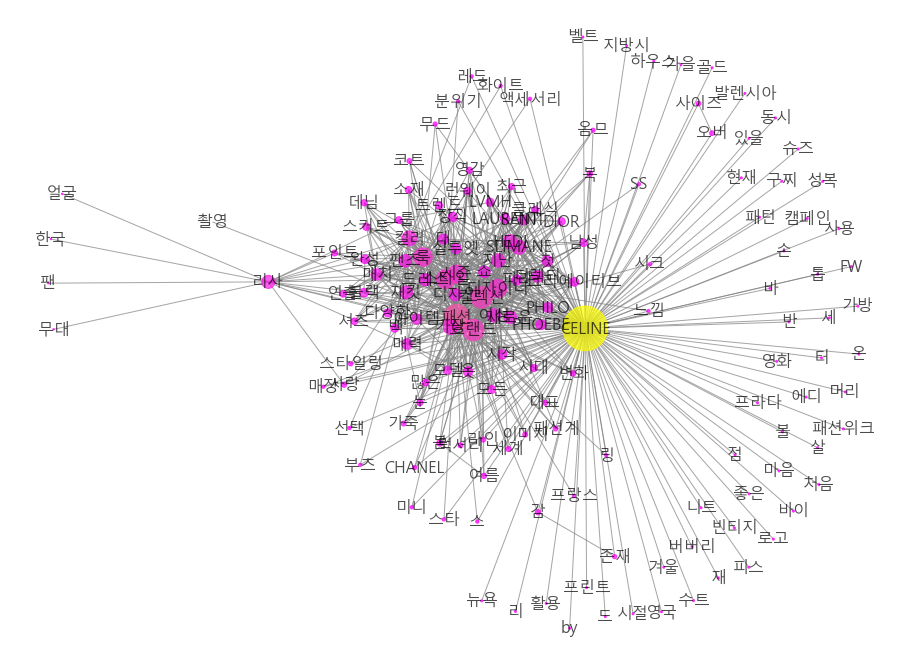

In [98]:
plt.figure(figsize = (16, 12)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.spring)

plt.savefig('./nt_CEL_top200_mins04.png', bbox_inches = 'tight')
plt.show()
